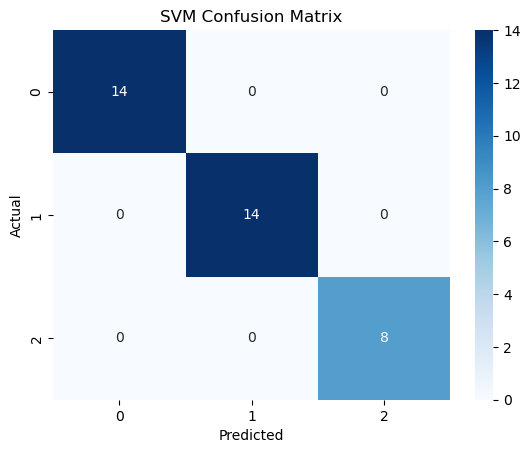

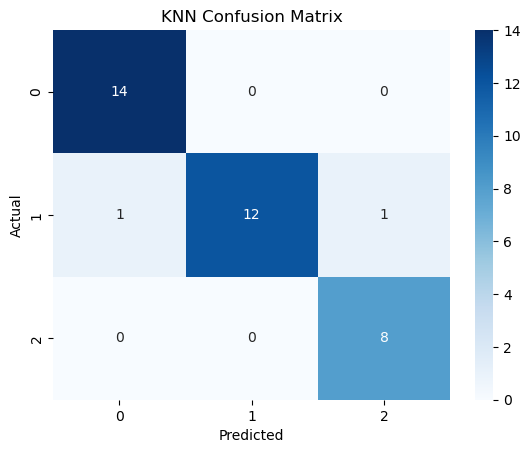

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


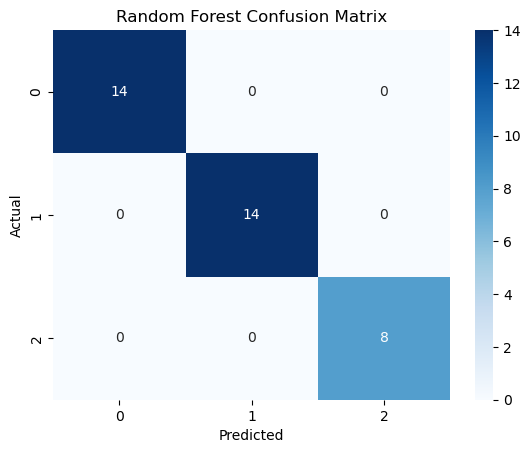

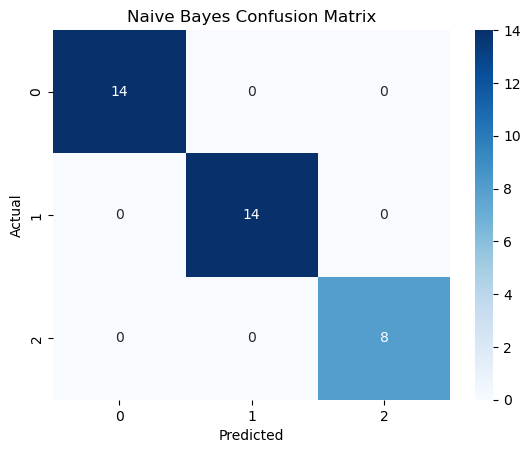

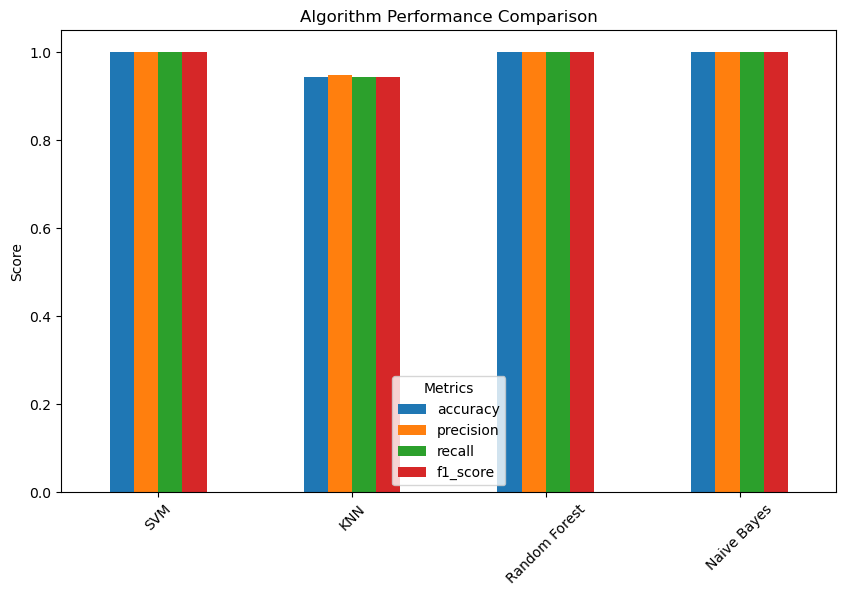


SVM Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000

KNN Results:
Accuracy: 0.9444
Precision: 0.9494
Recall: 0.9444
F1_score: 0.9436

KMeans Results:
Silhouette_score: 0.2849

Random Forest Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000

Naive Bayes Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score

# Load and preprocess the data
data = pd.read_csv("Wine dataset.csv")
X = data.drop(columns=['class'])
y = data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Results storage
results = {}

# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, svm_predictions),
    'precision': precision_score(y_test, svm_predictions, average='weighted'),
    'recall': recall_score(y_test, svm_predictions, average='weighted'),
    'f1_score': f1_score(y_test, svm_predictions, average='weighted')
}
plot_confusion_matrix(y_test, svm_predictions, "SVM Confusion Matrix")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
results['KNN'] = {
    'accuracy': accuracy_score(y_test, knn_predictions),
    'precision': precision_score(y_test, knn_predictions, average='weighted'),
    'recall': recall_score(y_test, knn_predictions, average='weighted'),
    'f1_score': f1_score(y_test, knn_predictions, average='weighted')
}
plot_confusion_matrix(y_test, knn_predictions, "KNN Confusion Matrix")

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
results['KMeans'] = {'silhouette_score': silhouette_avg}

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_predictions),
    'precision': precision_score(y_test, rf_predictions, average='weighted'),
    'recall': recall_score(y_test, rf_predictions, average='weighted'),
    'f1_score': f1_score(y_test, rf_predictions, average='weighted')
}
plot_confusion_matrix(y_test, rf_predictions, "Random Forest Confusion Matrix")

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_predictions),
    'precision': precision_score(y_test, nb_predictions, average='weighted'),
    'recall': recall_score(y_test, nb_predictions, average='weighted'),
    'f1_score': f1_score(y_test, nb_predictions, average='weighted')
}
plot_confusion_matrix(y_test, nb_predictions, "Naive Bayes Confusion Matrix")

# Comparison of Algorithms
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
comparison = {algo: [results[algo].get(metric, np.nan) for metric in metrics] for algo in results if algo != 'KMeans'}
comparison_df = pd.DataFrame(comparison, index=metrics)

# Plot the comparison
comparison_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Algorithm Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

# Print detailed results
for algo, metrics in results.items():
    print(f"\n{algo} Results:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")